<a href="https://colab.research.google.com/github/Ankit-521/Ankit-521/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.5 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as track_time
from datetime import datetime, time, date
import mplfinance as mpf

In [3]:
# functions

In [4]:
df = pd.read_parquet('/content/drive/MyDrive/Project/nifty_data.parquet')

In [5]:
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00+05:30,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00+05:30,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00+05:30,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00+05:30,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00+05:30,8300.60,8301.30,8298.75,8301.20,0


In [6]:
print('total data length', df.shape[0])

total data length 783073


In [7]:
df['time'] = df['date'].dt.time

In [8]:
df['date_ist'] = df['date'].dt.date

In [9]:
df.head()

,date,open,high,low,close,volume,time,date_ist
0,2015-01-09 09:15:00+05:30,8285.45,8295.90,8285.45,8292.10,0,09:15:00,2015-01-09
1,2015-01-09 09:16:00+05:30,8292.60,8293.60,8287.20,8288.15,0,09:16:00,2015-01-09
2,2015-01-09 09:17:00+05:30,8287.40,8293.90,8287.40,8293.90,0,09:17:00,2015-01-09
3,2015-01-09 09:18:00+05:30,8294.25,8300.65,8293.90,8300.65,0,09:18:00,2015-01-09
4,2015-01-09 09:19:00+05:30,8300.60,8301.30,8298.75,8301.20,0,09:19:00,2015-01-09


# Data cleaning

In [10]:
# our control on trading
start_time = time(9, 15, 0)
end_time = time(15, 30, 0)

In [11]:
filtered_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

In [12]:
filtered_df.head()

,date,open,high,low,close,volume,time,date_ist
0,2015-01-09 09:15:00+05:30,8285.45,8295.90,8285.45,8292.10,0,09:15:00,2015-01-09
1,2015-01-09 09:16:00+05:30,8292.60,8293.60,8287.20,8288.15,0,09:16:00,2015-01-09
2,2015-01-09 09:17:00+05:30,8287.40,8293.90,8287.40,8293.90,0,09:17:00,2015-01-09
3,2015-01-09 09:18:00+05:30,8294.25,8300.65,8293.90,8300.65,0,09:18:00,2015-01-09
4,2015-01-09 09:19:00+05:30,8300.60,8301.30,8298.75,8301.20,0,09:19:00,2015-01-09


In [13]:
date_cnts = filtered_df['date_ist'].value_counts()
date_cnt_df = pd.DataFrame(date_cnts)
date_cnt_df = date_cnt_df.reset_index()
date_cnt_df = date_cnt_df.rename(columns = {'index':'date_ist','date_ist':'count'})
date_cnt_df.head()

,date_ist,count
0,2015-01-09,375
1,2020-08-03,375
2,2020-09-15,375
3,2020-09-14,375
4,2020-09-11,375


In [ ]:
df.iloc[0]['date_ist']

datetime.date(2015, 1, 9)

In [ ]:
df['date_ist'].iloc[0]

datetime.date(2015, 1, 9)

In [ ]:
(df['time']==time(9,20,0)).sum()

2086

In [ ]:
(df['time']==time(15,20,0)).sum()

2086

In [ ]:
date(2021, 2, 24)

datetime.date(2021, 2, 24)

In [ ]:
time(9,20,0) in set(df[df['date_ist']==date(2021, 2, 24)]['time'])

True

In [ ]:
filtered_df.shape

(782506, 8)

In [ ]:
date_cnt_df[date_cnt_df['count']==54]

,date_ist,count
2087,2021-02-24,54


In [ ]:
date_cnt_df[date_cnt_df['count']==336]

,date_ist,count
2086,2017-02-21,336


In [ ]:
date_cnt_df[date_cnt_df['count']==355]

,date_ist,count
2084,2015-03-16,355
2085,2015-03-13,355


In [ ]:
date_cnt_df[date_cnt_df['count']==357]

,date_ist,count
2083,2015-12-22,357


In [ ]:
date_cnt_df[date_cnt_df['count']==361]

,date_ist,count
2082,2019-09-23,361


In [ ]:
date_cnt_df[date_cnt_df['count']==364]

,date_ist,count
2081,2015-01-19,364


In [ ]:
date_cnt_df[date_cnt_df['count']==367]

,date_ist,count
2079,2015-09-07,367
2080,2015-09-02,367


In [ ]:
date_cnt_df[date_cnt_df['count']==368]

,date_ist,count
2078,2023-06-14,368


In [ ]:
date_cnt_df[date_cnt_df['count']==370]

,date_ist,count
2077,2015-07-20,370


In [ ]:
date_cnt_df[date_cnt_df['count']==371]

,date_ist,count
2076,2015-08-24,371


In [ ]:
date_cnt_df[date_cnt_df['count']==372]

,date_ist,count
2074,2019-04-18,372
2075,2022-03-07,372


In [ ]:
date_cnt_df[date_cnt_df['count']==373]

,date_ist,count
2072,2015-09-23,373
2073,2020-08-27,373


In [ ]:
date_cnt_df[date_cnt_df['count']==374]

,date_ist,count
2063,2020-11-02,374
2064,2023-06-05,374
2065,2015-09-16,374
2066,2020-02-13,374
2067,2019-09-18,374
2068,2021-12-20,374
2069,2020-03-04,374
2070,2015-09-18,374
2071,2019-08-02,374


In [ ]:
set(date_cnt_df['count'])

{54, 336, 355, 357, 361, 364, 367, 368, 370, 371, 372, 373, 374, 375}

In [ ]:
plot_df = filtered_df[['date', 'open', 'high', 'low', 'close']]

In [ ]:
plot_df.set_index('date', inplace=True)

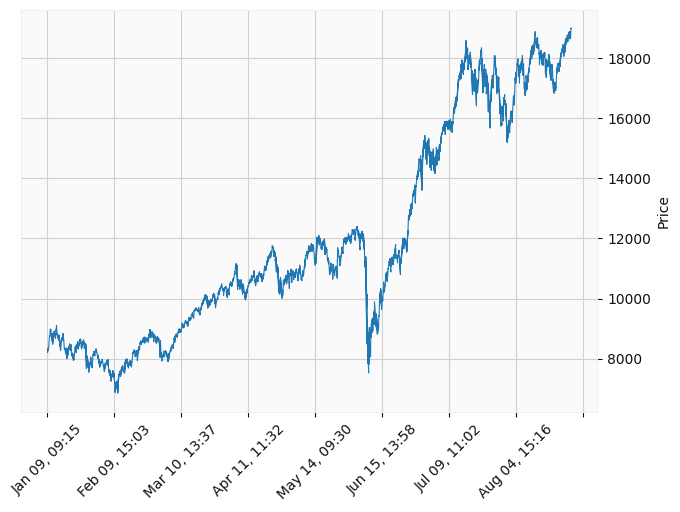

In [ ]:
mpf.plot(plot_df, type='line', style='yahoo')

In [ ]:
filtered_df.shape

(782506, 8)

In [ ]:
filtered_df['date_ist'].nunique()

2088

In [ ]:
time_counts = df['time'].value_counts()

In [ ]:
time_cnt_df = pd.DataFrame(time_counts)
time_cnt_df = time_cnt_df.reset_index()
time_cnt_df = time_cnt_df.rename(columns = {'index':'timestamp','time':'count'})
time_cnt_df['timestamp'] = pd.to_datetime(time_cnt_df['timestamp'], format='%H:%M:%S').dt.time
time_cnt_df.head()

,timestamp,count
0,09:55:00,2088
1,09:59:00,2088
2,10:07:00,2088
3,10:06:00,2088
4,09:45:00,2088


In [ ]:
time_cnt_df['timestamp'].dt.time

0      09:55:00
1      09:59:00
2      10:07:00
3      10:06:00
4      09:45:00
         ...   
565    16:06:00
566    16:05:00
567    16:04:00
568    16:03:00
569    16:59:00
Name: timestamp, Length: 570, dtype: object

In [ ]:
filtered_df = time_cnt_df[(time_cnt_df['timestamp'] >= start_time) & (time_cnt_df['timestamp'] <= end_time)]

In [ ]:
set(filtered_df['count'])

{2085, 2086, 2087, 2088}

In [ ]:
[ (x,filtered_df[filtered_df['count']==x].shape[0]) for x in set(filtered_df['count'])]

[(2088, 19), (2085, 11), (2086, 116), (2087, 229)]

In [ ]:
type(time_cnt_df['timestamp'][0])

str

In [ ]:
print(start_time,end_time)

09:15:00 15:30:00


In [ ]:
print("total number of timestamps:",len(time_counts))

total number of timestamps 570


In [ ]:
time

In [ ]:
60*6+15

375

In [ ]:
set(time_counts)

{1, 2, 6, 7, 2085, 2086, 2087, 2088}

In [ ]:
[ (x,time_cnt_df[time_cnt_df['time']==x].shape[0]) for x in set(time_counts)]

[(1, 78),
 (2, 57),
 (2085, 11),
 (2086, 116),
 (7, 15),
 (2088, 19),
 (2087, 229),
 (6, 45)]

There are 570 distinct time minutes


In [ ]:
time_cnt_df[time_cnt_df['time']==1].shape

(78, 1)

In [ ]:
time_cnt_df[time_cnt_df['time']==2].shape

(57, 1)

In [ ]:
time_cnt_df[time_cnt_df['time']==6].shape

(45, 1)

In [ ]:
time_cnt_df[time_cnt_df['time']==7].shape

(15, 1)

In [ ]:
time_cnt_df[time_cnt_df['time']==6]

In [ ]:
# dataNifty50 = yf.download('^NSEI', period="2y", interval="1h")

In [ ]:
dataNifty50 = dataNifty50.reset_index()

In [ ]:
dataNifty50 = dataNifty50.apply(get_time,axis=1)

In [ ]:
for i in range(6,dataNifty50.shape[0]):
  if ((dataNifty50.iloc[i-6]['Timestamp']!='09:15:00') and (dataNifty50.iloc[i]['Timestamp']=='15:15:00')):
    print(i)


515


In [ ]:
dataNifty50.iloc[516:520]

,Datetime,Open,High,Low,Close,Adj Close,Volume,Timestamp
516,2021-10-19 09:15:00+05:30,18602.349609,18602.349609,18400.550781,18459.599609,18459.599609,0,09:15:00
517,2021-10-19 10:15:00+05:30,18457.849609,18551.400391,18439.650391,18534.800781,18534.800781,0,10:15:00
518,2021-10-19 11:15:00+05:30,18536.550781,18583.550781,18529.199219,18573.500000,18573.500000,0,11:15:00
519,2021-10-19 12:15:00+05:30,18574.150391,18590.949219,18551.349609,18582.599609,18582.599609,0,12:15:00


In [ ]:
510/7

72.85714285714286

In [ ]:
dataNifty50.iloc[:511]['Timestamp'].value_counts()

09:15:00    73
10:15:00    73
11:15:00    73
12:15:00    73
13:15:00    73
14:15:00    73
15:15:00    73
Name: Timestamp, dtype: int64

In [ ]:
# dataNifty50 = dataNifty50.drop(539)

In [ ]:
dataNifty50 = dataNifty50[dataNifty50['Timestamp']!='18:15:00']

In [ ]:
dataNifty50.shape[0]/7

492.7142857142857

In [ ]:
dataNifty50 = dataNifty50[516:]

In [ ]:
x = []
y = []
for i in range(1,int(dataNifty50.shape[0]/7)):
  l_c = dataNifty50.iloc[7*i-1]['Close']
  t_o = dataNifty50.iloc[7*i]['Open']
  t_c = dataNifty50.iloc[7*i+6]['Close']
  x_val = (t_o - l_c)/l_c
  y_val = (t_c - t_o)/t_o
  x.append(x_val)
  y.append(y_val)

In [ ]:
np.array(x).sum()

0.32772539782689947

In [ ]:
np.array(y).sum()

-0.26627498327268906

<BarContainer object of 418 artists>

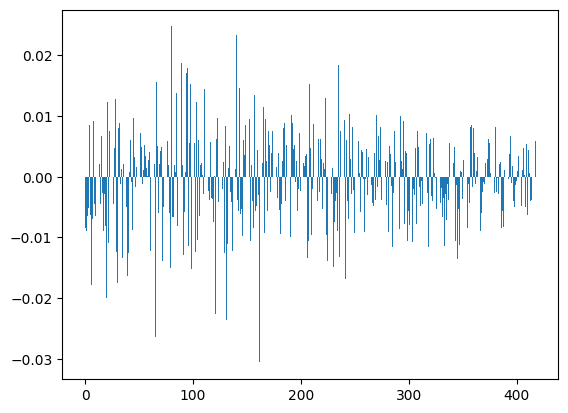

In [ ]:
plt.bar(range(len(y)),np.array(y))

<BarContainer object of 418 artists>

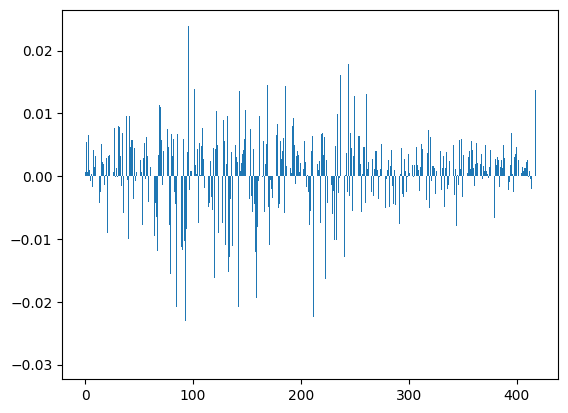

In [ ]:
plt.bar(range(len(x)),np.array(x))

In [ ]:
prob_list_1 = []
prob_list_2 = []
prob_list_3 = []
prob_list_4 = []
prob_list = []
for i in range(int(len(x)/20)):
  x1 = x[i*20:min((i+1)*20,len(x))]
  # mean = np.array(x1).sum()/len(x1)
  prof_prob = (np.array(x1)>0).sum()/len(x1)
  prob_1 = (np.array(x1)>0.001).sum()/len(x1)
  prob_2 = (np.array(x1)>0.0015).sum()/len(x1)
  prob_3 = (np.array(x1)<-0.001).sum()/len(x1)
  prob_4 = (np.array(x1)<-0.0015).sum()/len(x1)
  # print(prof_prob,prob_1,prob_2,prob_3,prob_4)
  prob_list.append(prof_prob)
  prob_list_1.append(prob_1)
  prob_list_2.append(prob_2)
  prob_list_3.append(prob_3)
  prob_list_4.append(prob_4)

<BarContainer object of 20 artists>

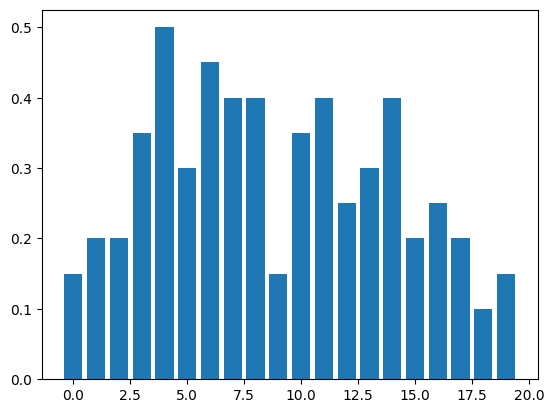

In [ ]:
plt.bar(range(len(prob_list_4)),np.array(prob_list_4))

<BarContainer object of 20 artists>

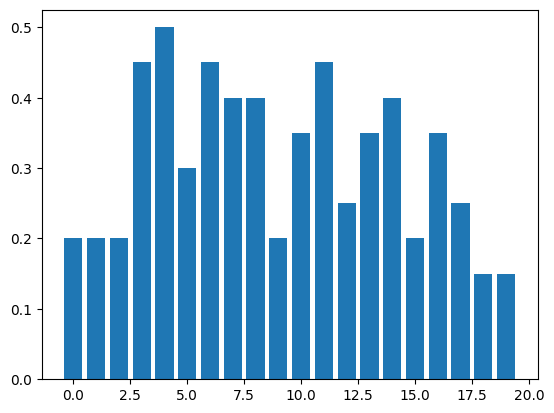

In [ ]:
plt.bar(range(len(prob_list_3)),np.array(prob_list_3))

<BarContainer object of 20 artists>

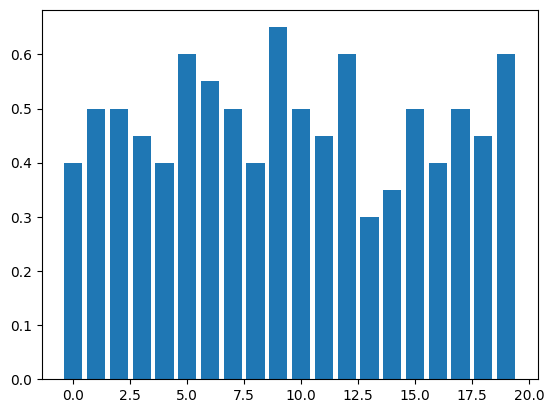

In [ ]:
plt.bar(range(len(prob_list_2)),np.array(prob_list_2))

<BarContainer object of 20 artists>

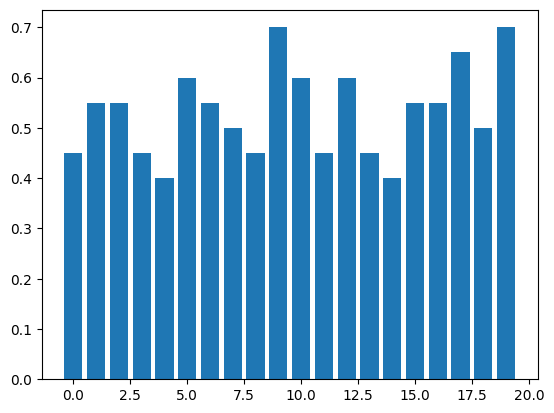

In [ ]:
plt.bar(range(len(prob_list_1)),np.array(prob_list_1))

In [ ]:
np.array(x).sum()/len(x)

0.0007840320522174628

In [ ]:
(np.array(x)<0).sum()/len(x)

0.36363636363636365

In [ ]:
(np.array(x)<-0.001).sum()/len(x)

0.29904306220095694

In [ ]:
vals = []
for j in range(0,len(x),20):
  val = 100
  for i in x[j:min(j+20,len(x))]:
    val = val *(1+i)
  vals.append(val-100)

<BarContainer object of 21 artists>

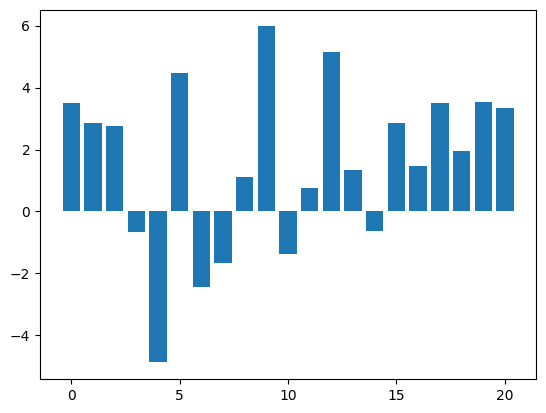

In [ ]:
plt.bar(range(len(vals)),np.array(vals))

In [ ]:
vals = []
for j in range(0,len(y),20):
  val = 100
  for i in y[j:min(j+20,len(y))]:
    val = val *(1+i)
  vals.append(val-100)

<BarContainer object of 21 artists>

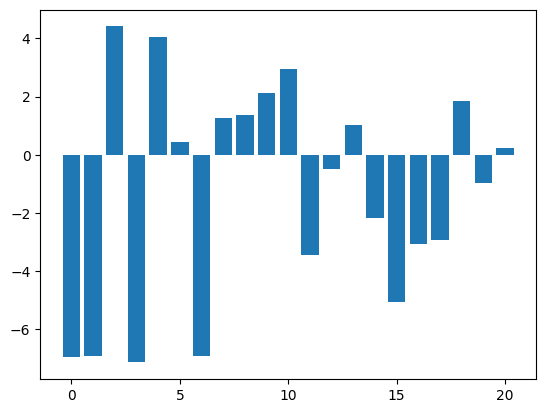

In [ ]:
plt.bar(range(len(vals)),np.array(vals))

In [ ]:
val = 100
for i in y[:1000]:
  val = val *(1+i/100)
print(val)

38.60699977098695


In [ ]:
np.array(y).sum()

-7.941876467477146

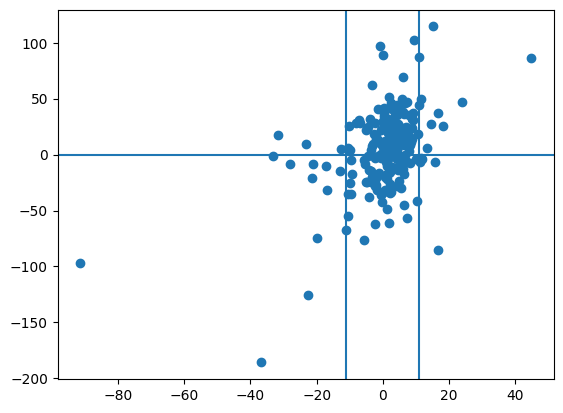

In [ ]:
plt.scatter(np.array(x), np.array(y))
plt.axhline(y=0)
plt.axvline(x=11)
plt.axvline(x=-11)
plt.show()

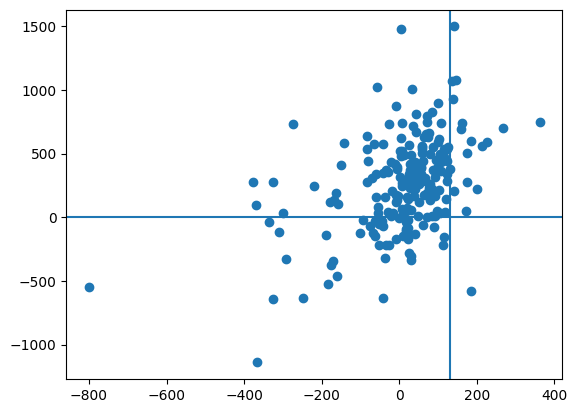

In [ ]:
plt.scatter(np.array(x), np.array(y1))
plt.axhline(y=0)
plt.axvline(x=130)
plt.show()

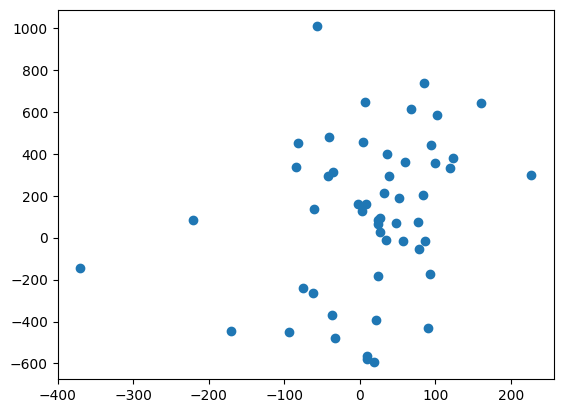

In [ ]:
plt.scatter(np.array(x), np.array(y))
plt.show()

In [ ]:
dataNifty50 = yf.download('^NSEI', period="2y", interval="1wk")


In [ ]:
import datetime as dt

In [ ]:
start = dt.datetime.today()-dt.timedelta(30)

In [ ]:
end = dt.datetime.today()

In [ ]:
data = yf.download('MSFT', period="60d", interval="30m")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(780, 6)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-29 09:30:00,278.959991,279.970001,278.410004,279.904999,279.904999,3201214
2023-03-29 10:00:00,279.929993,280.660004,279.589996,279.760010,279.760010,2235145
2023-03-29 10:30:00,279.779999,279.869995,278.700012,278.859985,278.859985,1655025
2023-03-29 11:00:00,278.869995,279.461304,278.410004,279.440002,279.440002,1137230
2023-03-29 11:30:00,279.480011,279.950012,279.079987,279.690002,279.690002,1146875


In [ ]:
dataLong = yf.download("MSFT", start="2021-01-12", end="2023-06-23")

[*********************100%***********************]  1 of 1 completed


In [ ]:
dataLong.shape

(615, 6)

In [ ]:
dataLong.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-12,216.500000,217.100006,213.320007,214.929993,210.177689,23249300
2021-01-13,214.020004,216.759995,213.929993,216.339996,211.556488,20087100
2021-01-14,215.910004,217.460007,212.740005,213.020004,208.309891,29480800
2021-01-15,213.520004,214.509995,212.029999,212.649994,207.948074,31746500
2021-01-19,213.750000,216.979996,212.630005,216.440002,211.654297,30480900


In [ ]:
dataLong.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-15,337.480011,349.839996,337.200012,348.100006,348.100006,38899100
2023-06-16,351.320007,351.470001,341.950012,342.329987,342.329987,46533600
2023-06-20,339.309998,342.079987,335.859985,338.049988,338.049988,26375400
2023-06-21,336.369995,337.730011,332.070007,333.559998,333.559998,25117800
2023-06-22,334.119995,340.119995,333.339996,339.709991,339.709991,23556800


In [ ]:
!pip install nsetools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nsetools --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nsetools import Nse

In [ ]:
nse = Nse()

In [ ]:
print(nse)

Driver Class for National Stock Exchange (NSE)


In [ ]:
from pprint import pprint

In [ ]:
import requests

In [ ]:
nse.get_index_list(as_json=True)

HTTPError: ignored

In [ ]:
q = nse.get_quote('infy') # it's ok to use both upper or lower case for codes.

HTTPError: ignored

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'fax': '425 706 7329',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, Syst

In [ ]:
# get historical market data
hist = msft.history(period="1mo")

In [ ]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-22 00:00:00-04:00,318.600006,322.589996,318.010010,321.179993,24115700,0.0,0.0
2023-05-23 00:00:00-04:00,320.029999,322.720001,315.250000,315.260010,30797200,0.0,0.0
2023-05-24 00:00:00-04:00,314.730011,316.500000,312.609985,313.850006,23384900,0.0,0.0
2023-05-25 00:00:00-04:00,323.239990,326.899994,320.000000,325.920013,43301700,0.0,0.0
2023-05-26 00:00:00-04:00,324.019989,333.399994,323.880005,332.890015,36630600,0.0,0.0
2023-05-30 00:00:00-04:00,335.230011,335.739990,330.519989,331.209991,29503100,0.0,0.0
2023-05-31 00:00:00-04:00,332.290009,335.940002,327.329987,328.390015,45950600,0.0,0.0
2023-06-01 00:00:00-04:00,325.929993,333.529999,324.720001,332.579987,26773900,0.0,0.0
2023-06-02 00:00:00-04:00,334.250000,337.500000,332.549988,335.399994,25864000,0.0,0.0


In [ ]:
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': Timestamp('1986-03-13 09:30:00-0500', tz='America/New_York'),
 'regularMarketTime': Timestamp('2023-06-20 16:00:06-0400', tz='America/New_York'),
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 338.05,
 'chartPreviousClose': 318.34,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'start': Timestamp('2023-06-21 04:00:00-0400', tz='America/New_York'),
   'end': Timestamp('2023-06-21 09:30:00-0400', tz='America/New_York')},
  'regular': {'start': Timestamp('2023-06-21 09:30:00-0400', tz='America/New_York'),
   'end': Timestamp('2023-06-21 16:00:00-0400', tz='America/New_York')},
  'post': {'start': Timestamp('2023-06-21 16:00:00-0400', tz='America/New_York'),
   'end': Timestamp('2023-06-21 20:00:00-0400', tz='America/New_York')}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  

In [ ]:
msft.dividends

Series([], Name: Dividends, dtype: float64)

In [ ]:
msft.splits

Series([], Name: Stock Splits, dtype: float64)

In [ ]:
msft.capital_gains

[]

In [ ]:
msft.shares

Exception: ignored

In [ ]:
msft.get_shares_full(start="2022-01-01", end=None)

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
2022-03-05 00:00:00-05:00    7496869888
2022-03-16 00:00:00-04:00    7595310080
2022-03-17 00:00:00-04:00    7496869888
2022-03-28 00:00:00-04:00    7507230208
2022-03-31 00:00:00-04:00    7496869888
2022-04-01 00:00:00-04:00    7631819776
2022-04-02 00:00:00-04:00    7496869888
2022-04-04 00:00:00-04:00    7496869888
2022-04-29 00:00:00-04:00    7479029760
2022-06-09 00:00:00-04:00    7536840192
2022-06-13 00:00:00-04:00    7479029760
2022-07-28 00:00:00-04:00    7464000000
2022-08-01 00:00:00-04:00    7457889792
2022-08-25 00:00:00-04:00    7475469824
2022-08-26 00:00:00-04:00    7457889792
2022-09-01 00:00:00-04:00    7457889792
2022-09-02 00:00:00-04:00    7488540160
2022-09-02 00:00:00-04:00    7457889792
2022-09-10 00:00:00-04:00    7290379776
2022-09-12 00:00:00-04:00    7457889792


In [ ]:
msft.income_stmt

Exception: ignored

In [ ]:


# get all stock info
msft.info



# show meta information about the history (requires history() to be called first)


# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:

# - accurate time-series count:
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations
msft.recommendations_summary
# show analysts other work
msft.analyst_price_target
msft.revenue_forecasts
msft.earnings_forecasts
msft.earnings_trend

# show next event (earnings, etc)
msft.calendar

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

In [ ]:
msft.option_chain('YYYY-MM-DD')

ValueError: ignored